# 0 PROYECTO

###### Spanish 
1. En este proyecto se realiza un comparador de descripciones inmobiliarias.
    * La finalidad de dicho comparador es observar si la descripción de un anuncio referente al sector inmobiliario puede o no ser fraudulento o estafa.
    * Para la obtención de las descripcione reales, se han utilizado 1000 descripciones scrapeadas de idealista
    * Para la obtención de descripciones ficticias, se ha solicitado a Chat GPT su creación (En tandas de 20), con diferentes pronts y siempre buscando la mayor realidad posible.
        * Se ha realizado a traves de esta IA a razón de la inexistencia de datos referentes a dicha casuistica.


###### English
1. In this project a comparator of real estate descriptions is made.
    * The purpose of this comparator is to check if the description of a real estate advertisement may or may not be fraudulent or scam.
    * To obtain the real descriptions, 1000 descriptions scraped from idealista have been used.
    * To obtain fictitious descriptions, Chat GPT has been asked to create them (in batches of 20), with different pronts and always looking for the best possible reality.
        * It has been done through this AI due to the inexistence of data concerning this casuistry.

# 1 LIBRERIES

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 IMPORT CSV

In [57]:
import pandas as pd

df = pd.read_csv(r"G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\29 FINAL INMO\03 NPL DESCRIPTION\falsas.csv", sep=';', encoding='latin1') 



df.head(10)

,descripcion,spam
0,Mansion en subasta relampago. Participe y grat...,1
1,descuento en zona oferta con necesidad privada...,1
2,Propiedad de alto nivel a precio de regalo. Re...,1
3,Increible oportunidad de inversion en descuent...,1
4,barato de campo en remate. Vendo esta joya de ...,1
5,Propiedad en liquidacion total. Piso con detal...,1
6,iVenta oferta! gratuito su piso de lujo en sub...,1
7,descuento con vista jardinliariaamica unica. O...,1
8,barato de prestigio a precio irresistible. iCo...,1
9,"barato de lujo a mitad de precio: ""barato de e...",1


CONCLUSION:

##### Spanish
* Destacar en este caso que, atendiendo a la complejidad textual de las descripciones utilizadas, se ha utilizado un encoding de latin1 para que el DF pudiese mostrarse y ser funcional.

##### English

* In this case, due to the textual complexity of the descriptions used, an encoding of Latin1 was used so that the DF could be displayed and be functional.

# 3 BUSINESS ANALYTICS

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   descripcion  2000 non-null   object
 1   spam         2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### 3.1 DUPLICATES

In [59]:
cantidad_verdaderas = (df['spam'] == 0).sum()
cantidad_falsas = (df['spam'] == 1).sum()

print(f"Descripciones verdaderas: {cantidad_verdaderas}")
print(f"Descripciones falsas: {cantidad_falsas}")

Descripciones verdaderas: 1000
Descripciones falsas: 1000


In [60]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False, drop = True)
df.shape

(1994, 2)

In [61]:
print(f"Spam: {len(df.loc[df.spam == 1])}")
print(f"No spam: {len(df.loc[df.spam == 0])}")

Spam: 998
No spam: 996


# 4 TEXT PROCESSING

#### 4.1 DOWNLOAD LANGUAJE RESOURCES FOR WORD PROCESSING

In [62]:
import nltk
nltk.download("omw")
nltk.download("stopwords")

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 4.2 PROCESSING SPANISH TEXT

In [63]:
import regex as re

def preprocess_text_spanish(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o una letra acentuada en español (áéíóúüñ) o un espacio en blanco ( )
    text = re.sub(r'[^a-záéíóúüñ ]', " ", text, flags=re.IGNORECASE)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags (esto puede no ser relevante para texto en español)
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

    return text.split()

# Aplicar la función de preprocesamiento a una columna llamada 'texto' en tu DataFrame
df["descripcion"] = df["descripcion"].apply(preprocess_text_spanish)
df.head()

,descripcion,spam
0,"[mansion, en, subasta, relampago, participe, y...",1
1,"[descuento, en, zona, oferta, con, necesidad, ...",1
2,"[propiedad, de, alto, nivel, a, precio, de, re...",1
3,"[increible, oportunidad, de, inversion, en, de...",1
4,"[barato, de, campo, en, remate, vendo, esta, j...",1


#### 4.3 LEMANIZATION

In [64]:
from nltk import download
import nltk
nltk.download("omw-1.4")  # Descargar el recurso para lematización en español
nltk.download("stopwords")  # Descargar la lista de palabras vacías en español

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download("wordnet")
lemmatizer = WordNetLemmatizer()

# Cambia "Spanish" a "spanish" en la siguiente línea para cargar las palabras vacías en español
stop_words = stopwords.words("spanish")

def lemmatize_text(words, lemmatizer=lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df["descripcion"] = df["descripcion"].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Password\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,descripcion,spam
0,"[mansion, subasta, relampago, participe, gratu...",1
1,"[descuento, zona, oferta, necesidad, privada, ...",1
2,"[propiedad, alto, nivel, precio, regalo, resid...",1
3,"[increible, oportunidad, inversion, descuento,...",1
4,"[barato, campo, remate, vendo, joya, naturalez...",1


#### 4.4 CLOUD WORDS

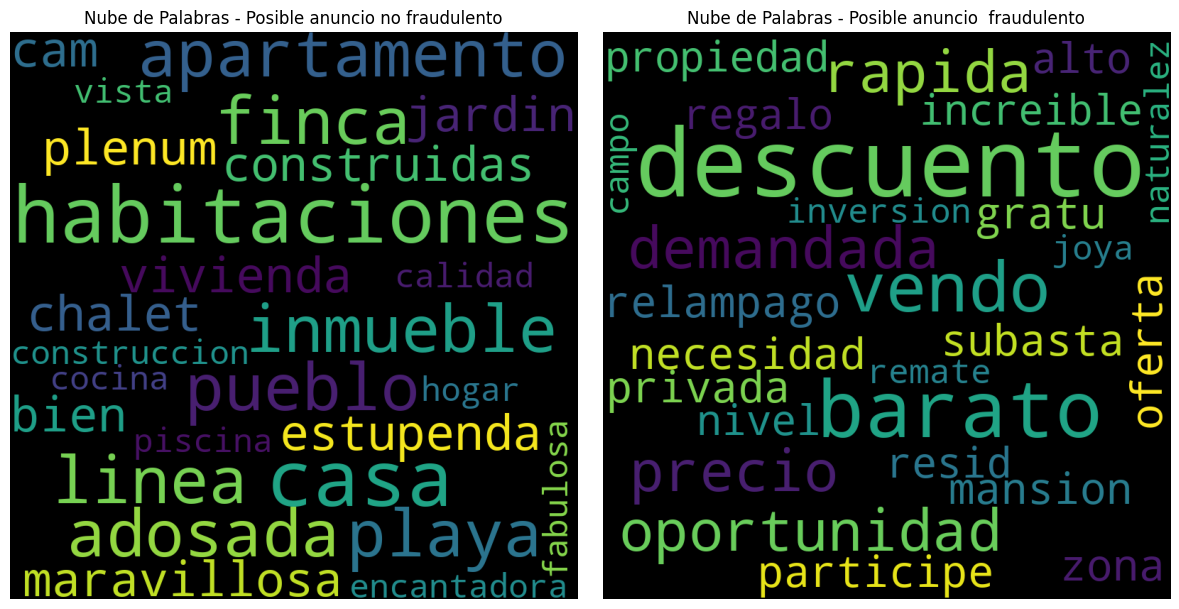

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtra las descripciones donde 'spam' es igual a 0
descripciones_spam_0 = df[df['spam'] == 0]['descripcion']

# Filtra las descripciones donde 'spam' es igual a 1
descripciones_spam_1 = df[df['spam'] == 1]['descripcion']

# Crea una nube de palabras para 'spam' igual a 0
wordcloud_spam_0 = WordCloud(width=800, height=800, background_color="black", max_words=1000, min_font_size=40, random_state=82) \
    .generate(str(descripciones_spam_0))

# Crea una nube de palabras para 'spam' igual a 1
wordcloud_spam_1 = WordCloud(width=800, height=800, background_color="black", max_words=1000, min_font_size=40, random_state=82) \
    .generate(str(descripciones_spam_1))

# Plotea la primera nube de palabras
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam_0)
plt.title("Nube de Palabras - Posible anuncio no fraudulento")
plt.axis("off")

# Plotea la segunda nube de palabras
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam_1)
plt.title("Nube de Palabras - Posible anuncio  fraudulento")
plt.axis("off")

plt.tight_layout()
plt.show()

#### 4.5 VECTORIAL REPRESENTATION OF TEXT

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df["descripcion"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["spam"]

X[:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18142955,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# 5 MACHINE LEARNING

#### 5.1 DIVISION TRAIN-TEST

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 5.2 SUPPORT VECTOR MACHINE

In [68]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C = 10, gamma = 0.1, decision_function_shape = 'ovr',probability = False, shrinking = False, random_state = 42)
model.fit(X_train, y_train)


SVC(C=10, gamma=0.1, random_state=42, shrinking=False)

#### 5.3 PREDICT MODEL TEST

In [69]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

#### 5.4 ACCURACY

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9974937343358395

# 6 SAVE MODEL

In [71]:
import joblib

# Guardar el modelo SVM en un archivo
joblib.dump(model, r"G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\29 FINAL INMO\03 NPL DESCRIPTION\ModelSVM1.pkl")
joblib.dump(model, r"G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\29 FINAL INMO\03 NPL DESCRIPTION\ModelSVM1.sav")
# Guardar el vectorizador TF-IDF en un archivo
joblib.dump(vectorizer, r"G:\Mi unidad\1 Archivos py\4 GEEK\2 PROYECTOS\29 FINAL INMO\03 NPL DESCRIPTION\VECTOR1.pkl")

['G:\\Mi unidad\\1 Archivos py\\4 GEEK\\2 PROYECTOS\\29 FINAL INMO\\03 NPL DESCRIPTION\\VECTOR1.pkl']

# 7 CONCLUSION

##### Spanish 
En conclusión, el modelo NLP desarrollado para la detección de estafas en descripciones inmobiliarias ha demostrado un rendimiento excepcional con una precisión de aproximadamente 0.9975. Esta alta precisión significa que el modelo es altamente efectivo para identificar y clasificar con precisión las descripciones legítimas de las potencialmente fraudulentas.

Estos resultados sugieren que este modelo tiene un gran potencial para ser utilizado como una herramienta de apoyo en la evaluación de descripciones inmobiliarias, permitiendo a los profesionales del sector y a las plataformas en línea identificar rápidamente contenido sospechoso y tomar medidas apropiadas.

Sin embargo, es crucial tener en cuenta que, aunque el modelo es altamente preciso, debe seguir siendo validado y refinado para asegurar su eficacia en situaciones del mundo real y evitar posibles sesgos o problemas éticos. La privacidad y la equidad deben ser consideraciones clave en la implementación de este tipo de modelos.

En última instancia, el éxito de este modelo resalta el poder de la inteligencia artificial y el procesamiento de lenguaje natural para abordar problemas de detección de fraudes, pero también destaca la importancia de un enfoque ético y cuidadoso en su desarrollo y aplicación en la práctica.


##### English

In conclusion, the NLP model developed for real estate description scam detection has demonstrated exceptional performance with an accuracy of approximately 0.9975. This high accuracy means that the model is highly effective in accurately identifying and classifying legitimate descriptions from potentially fraudulent ones.

These results suggest that this model has great potential to be used as a support tool in the evaluation of real estate descriptions, enabling industry professionals and online platforms to quickly identify suspicious content and take appropriate action.

However, it is crucial to keep in mind that while the model is highly accurate, it must continue to be validated and refined to ensure its effectiveness in real-world situations and avoid potential bias or ethical issues. Privacy and fairness must be key considerations in the implementation of this type of model.

Ultimately, the success of this model highlights the power of artificial intelligence and natural language processing to address fraud detection problems, but it also highlights the importance of an ethical and careful approach to its development and application in practice.